<a href="https://colab.research.google.com/github/diegorusso/deep-learning-from-scratch/blob/master/02_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Although the example is very simple, it shows many of the concepts needed for compex deep learning problems. The main advantage is that it can be illustrated.

Our machine will "learn" the function that maps one sets of numbers to another one: for example given a new one that it hasn't seen before, ir correctly predicts the result.

In other words the regression task is: **given a specific value of input x, predict the corresponding value of output y.**

For this example we assume the relationship between the inputs and the outputs that the machine has to learn is a **linear** function.

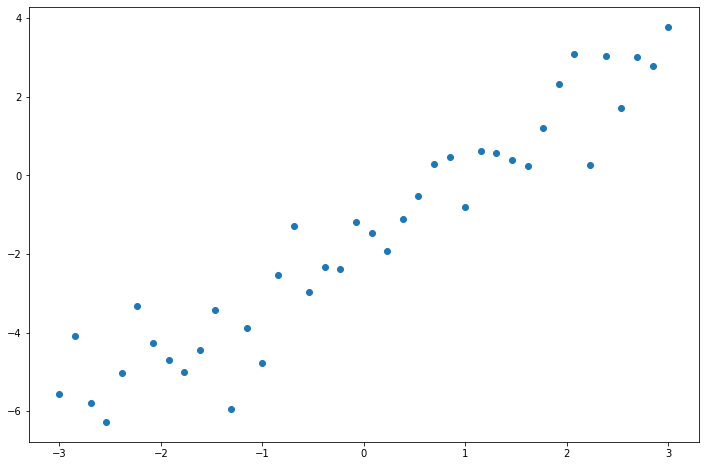

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

m = 40  # No. of points to generate
train_slope  = 1.5
train_offset = -1.5

# Generate training data
train_x = np.linspace(-3, 3, m)
rng = np.random.RandomState(seed=28)
train_y = train_slope * train_x + train_offset + rng.standard_normal(size=len(train_x))

# Plot the data
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(train_x, train_y, 'o');
plt.show()

Define two Python functions that represent a hypothesis (a straight line parameterized by slope and offset) and a cost function (the mean squared error) for linear regression.

The **hypothesis** is a mathematical formula that calculates the predicted outputs from the given inputs. The hypothesis is also known as a *model* (this is extremely simplistic model)

Slope and offset are **trainable parameters**, that means those parameters need to be learned.


In [2]:
# Define functions hypothesis and cost
def hypothesis(x, slope, offset):
    return slope * x + offset

def cost(x, slope, offset, y):
    return np.mean(np.square(hypothesis(x, slope, offset) - y )) / 2.0

The **cost** function calculates the MSE and it can be shown in the following image.

The cost function sometimes is referred as loss, objective, energy, fitness function (depending on the domain).

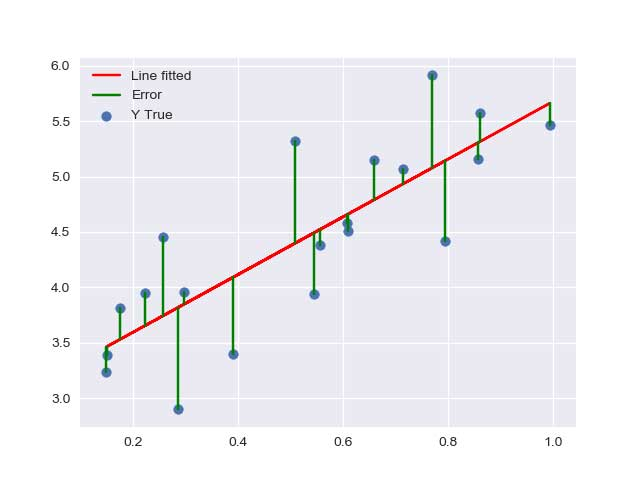

In the above case the red line is the hypothesis (our model) and the green lines express the individual error for every Y.

If we plot the cost as a function of the slope and offset we have something similar to the image below:

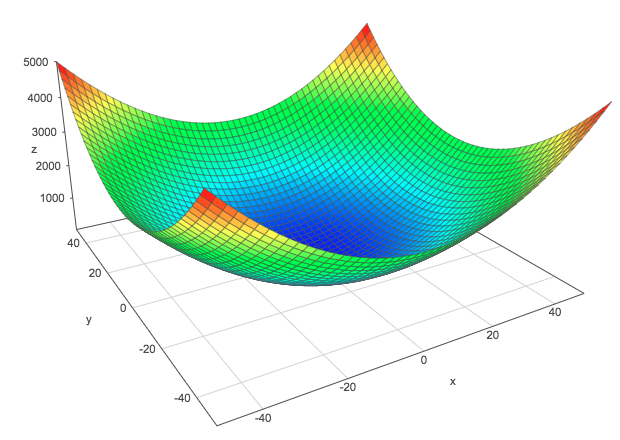

The goal of mathematical optimization is to find values for the parameters that **minimise the value of the cost function**.

The above problem is easy to solve because the minima is easy to find (at the bottom of the bowl shape)

For more complex cases **the gradient descend is a more scalable solution**: starting from a random poin on the surface, moves downhill until it can't go any lower. This is the minimum of the cost function.

The following code shows an implementation of the gradiend descend by calling the two function that calculate the derivative of the cost function with respect of the two parameters.

The algorithm print out the cost at each step and continue training until the cost reaches a stable value.

Cost at step 0 = 4.462, slope=0.167, offset=-0.056
Cost at step 1 = 3.798, slope=0.309, offset=-0.109
Cost at step 2 = 3.507, slope=0.398, offset=-0.079
Cost at step 3 = 3.457, slope=0.403, offset=-0.101
Cost at step 4 = 3.135, slope=0.484, offset=-0.130
Cost at step 5 = 2.951, slope=0.532, offset=-0.151
Cost at step 6 = 2.768, slope=0.602, offset=-0.127
Cost at step 7 = 2.671, slope=0.642, offset=-0.112
Cost at step 8 = 2.587, slope=0.681, offset=-0.096
Cost at step 9 = 2.583, slope=0.682, offset=-0.096
Cost at step 10 = 2.601, slope=0.668, offset=-0.110
Cost at step 11 = 2.375, slope=0.734, offset=-0.147
Cost at step 12 = 2.339, slope=0.754, offset=-0.136
Cost at step 13 = 2.236, slope=0.788, offset=-0.151
Cost at step 14 = 2.061, slope=0.846, offset=-0.181
Cost at step 15 = 2.055, slope=0.841, offset=-0.194
Cost at step 16 = 2.027, slope=0.857, offset=-0.188
Cost at step 17 = 2.040, slope=0.847, offset=-0.195
Cost at step 18 = 2.004, slope=0.852, offset=-0.215
Cost at step 19 = 2.00

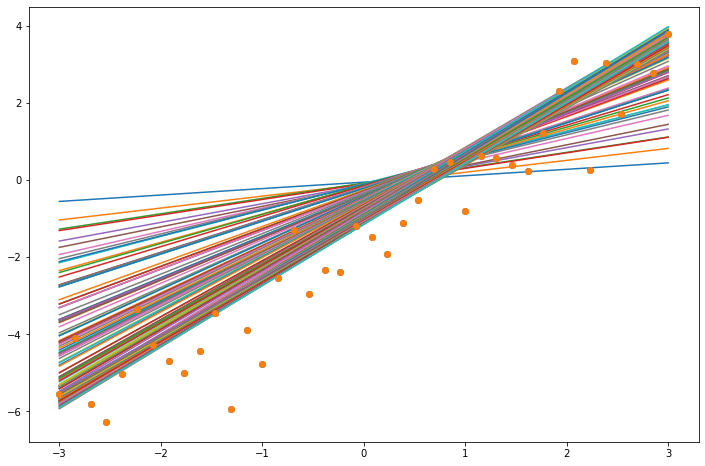

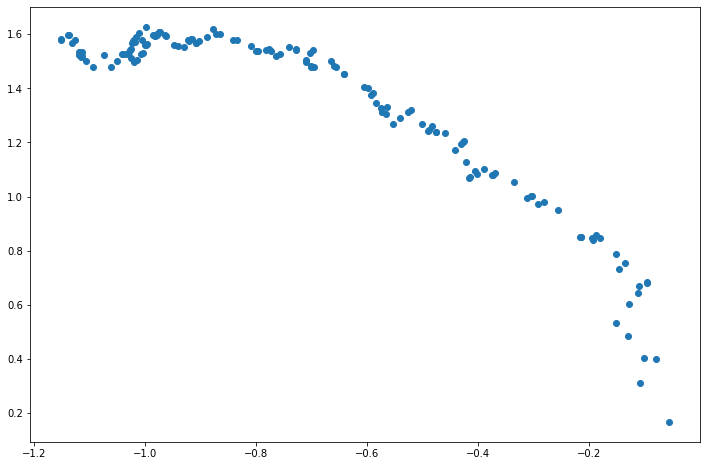

In [3]:
def hypothesis(x, slope, offset):
    return slope * x + offset

def cost(x, slope, offset, y):
    return np.mean(np.square(hypothesis(x, slope, offset) - y)) / 2.0

# Define two Python functions that calculate the partial derivatives of the cost
# function with respect to the two parameters slope and offset.
def derivative_wrt_slope(x, y):
    return np.mean((hypothesis(x, slope, offset) - y) * x)

def derivative_wrt_offset(x, y):
    return np.mean((hypothesis(x, slope, offset) - y))


num_steps = 150
learning_rate = 0.01
slope  = 0
offset = 0

slope_at_step  = np.empty((num_steps))
offset_at_step = np.empty((num_steps))
plt.rcParams["figure.figsize"] = (12, 8)

for step in range(num_steps):
    k = np.random.randint(m)
    x = train_x[k]
    y = train_y[k]
    
    # Update learned parameter values
    new_slope  = slope  - learning_rate * derivative_wrt_slope(x, y)
    new_offset = offset - learning_rate * derivative_wrt_offset(x, y)

    slope  = new_slope
    offset = new_offset
    
    slope_at_step[step] = slope
    offset_at_step[step] = offset
    
    print('Cost at step {} = {:5.3f}, slope={:5.3f}, offset={:5.3f}'.format(step, cost(train_x, slope, offset, train_y), slope, offset))
    plt.plot(train_x, slope * train_x + offset)

plt.plot(train_x, train_y, 'o');
plt.plot(train_x, train_y, 'o');
plt.show()

plt.scatter(offset_at_step, slope_at_step)
plt.show()

# Logistic Regression

Logistic regression is a regression model where the output is categorical: instead of predicting a value **the model predicts a category of the input data**.
It is basically a classification task.

In this example we have 2 features (coordinates of the point on a plane) and a classification (red, blue and green). We need to train the model so it can predict the color of a new point

## One-Hot Labels

Each category is represented by a label represented by *one-hot encoded* data. It means they are vectors where their size is the same of the total amount of the categories and there is a single 1 at the position of the given category. Hence one and only one element is "hot".

This is done in order to avoid any bias (compared in using integers).

The model (or hypothesis) now has:
* 2 inputs (x)
* 3 outputs (y)
* 9 trainable parameters (6 weights and 3 biases)

The image below shows what's going on in the model:

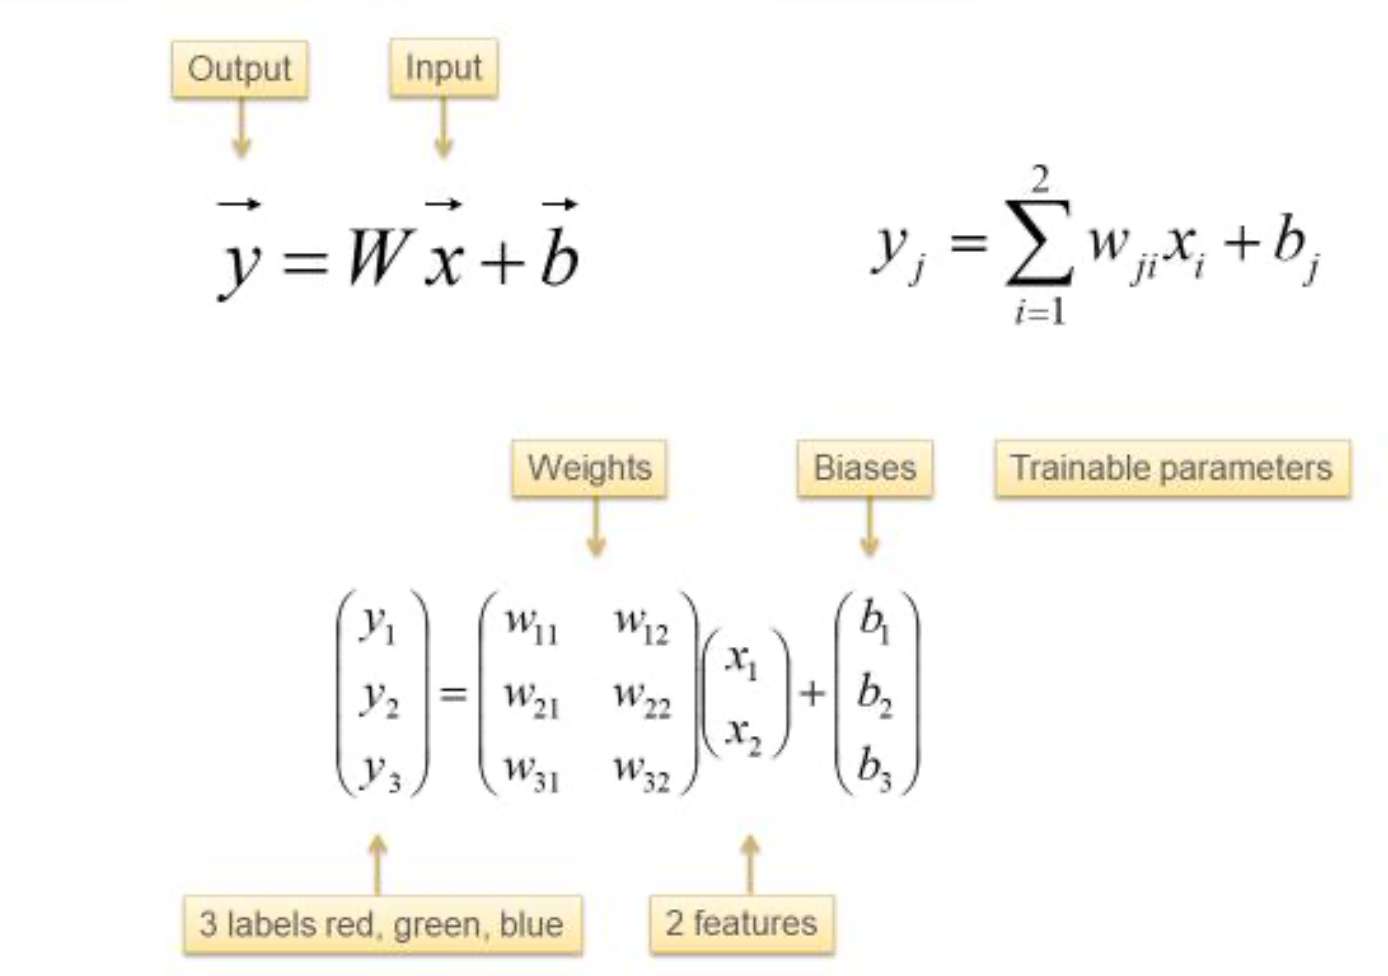



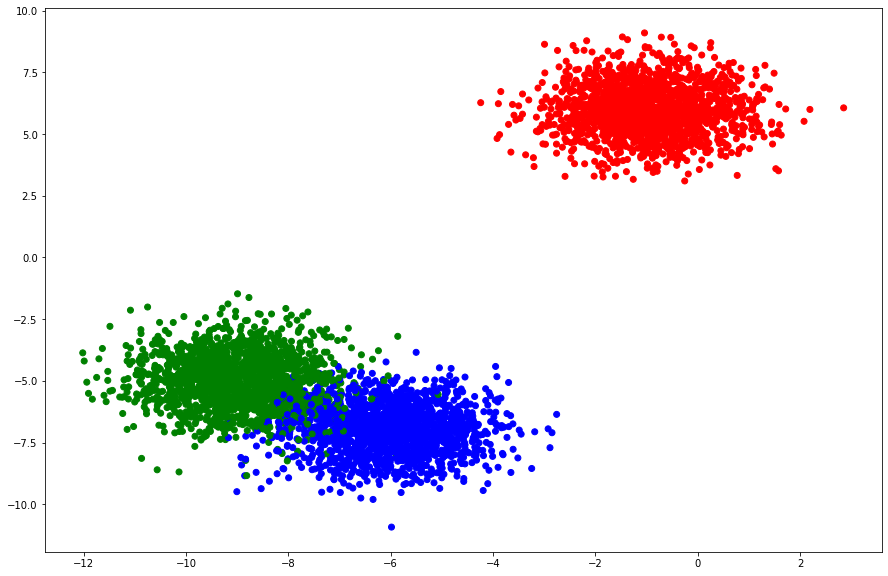

In [4]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate the dataset

m          = 5000 # The number of  points in the dataset
n_features = 2    # The 2 dimensions of each training data point
n_labels   = 3    # The categories shown as red, green, and blue

rng = np.random.RandomState(seed=42)  # Seed the random number generator

x = np.array((rng.standard_normal(m), rng.standard_normal(m)))
x = np.transpose(x)
y = np.empty((m))

for i in range(n_labels):
   x[i*m//n_labels:(i+1)*m//n_labels,0] += rng.randint(-10,+10)
   x[i*m//n_labels:(i+1)*m//n_labels,1] += rng.randint(-10,+10)
   y[i*m//n_labels:(i+1)*m//n_labels] = i

# Create the one-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

# Shuffle the training data samples prior to training to ensure that the order
# of the samples does not bias the training
indices = np.arange(m)
random.shuffle(indices)

train_x = np.empty((m,n_features)).astype(np.float32)
train_y = np.empty((m,n_labels)).astype(np.float32)

c = []  # List to hold the color of each data point in the plot

for i in range(m):
    train_x[i] = x[indices[i]]
    train_y[i] = y[indices[i]]
    if train_y[i,0] == 1:
        c.append('r')
    elif train_y[i,1] == 1:
        c.append('g')
    else:
        c.append('b')

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()

The **cost** function should calculate a number that represents the distance between the predicted output and the ground thruth across the entire training dataset: the average error.

The prediction should have the same shape and size of the labels so that we can compare them: each prediction is a vector of 3 floating-point numbers. We want to convert those numbers into probabilities and this can be done using the **softmax** function.

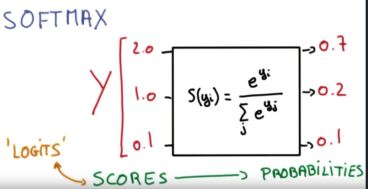

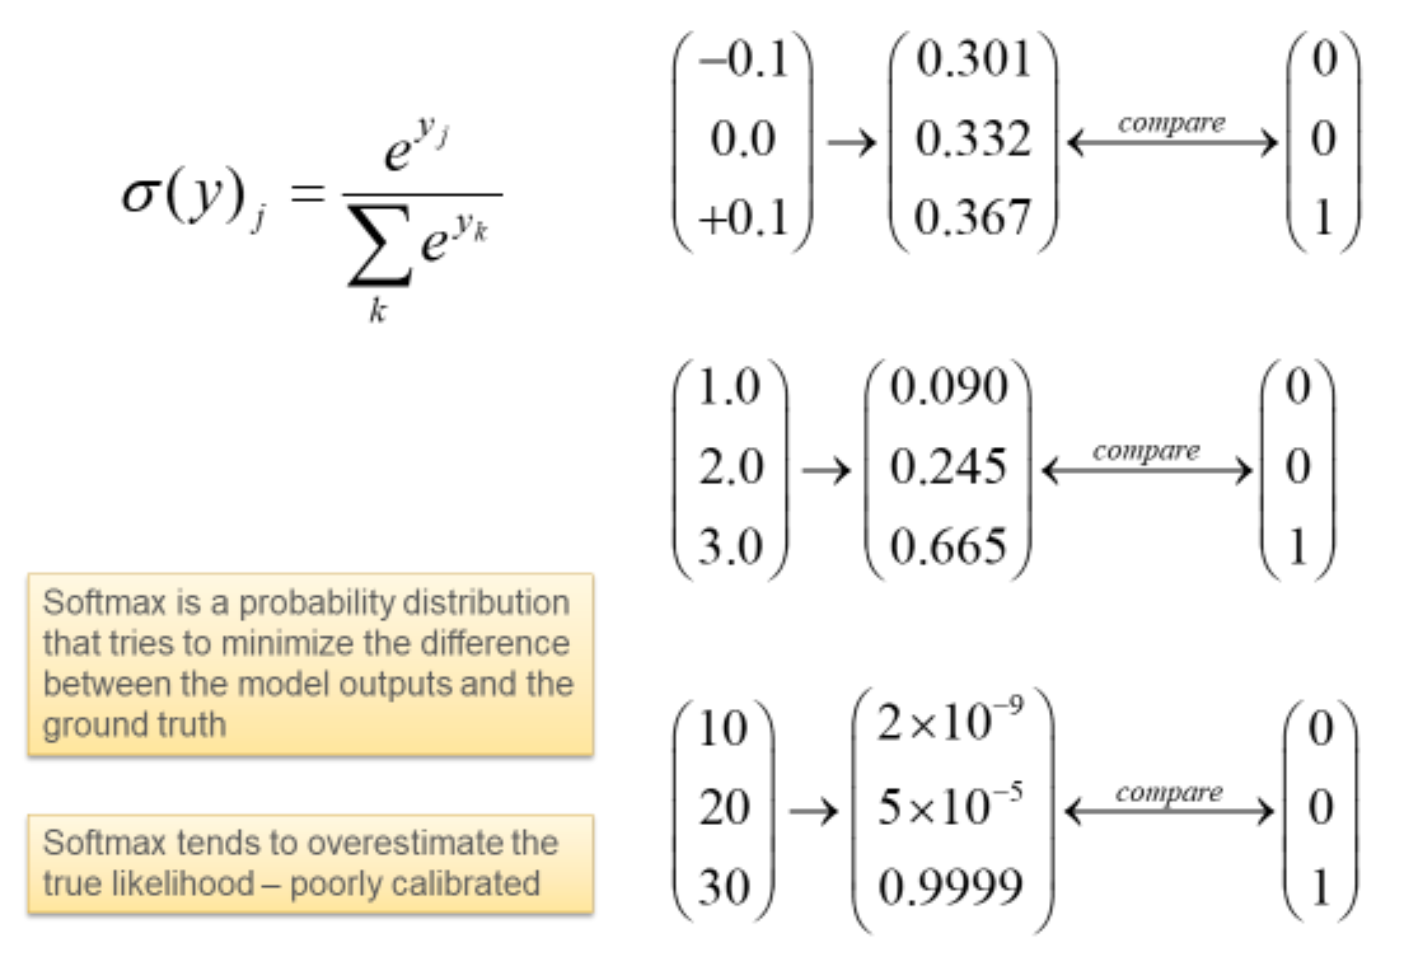

The last stage is to compare the softmax probabilities with the labels and this can be done using **cross-entropy function**.

It takes the dot product of the label vector with the negative log of the softmax vector. If the probability of a given label is close to 1.0 the cost will be to 0.0. Viceversa, is the probability of a given label is close to 0.0 the cost will be tending to +infinity.

The finale network is something like the image below. 

NOTE: this is not a deep neural network (there is no hidden layer)

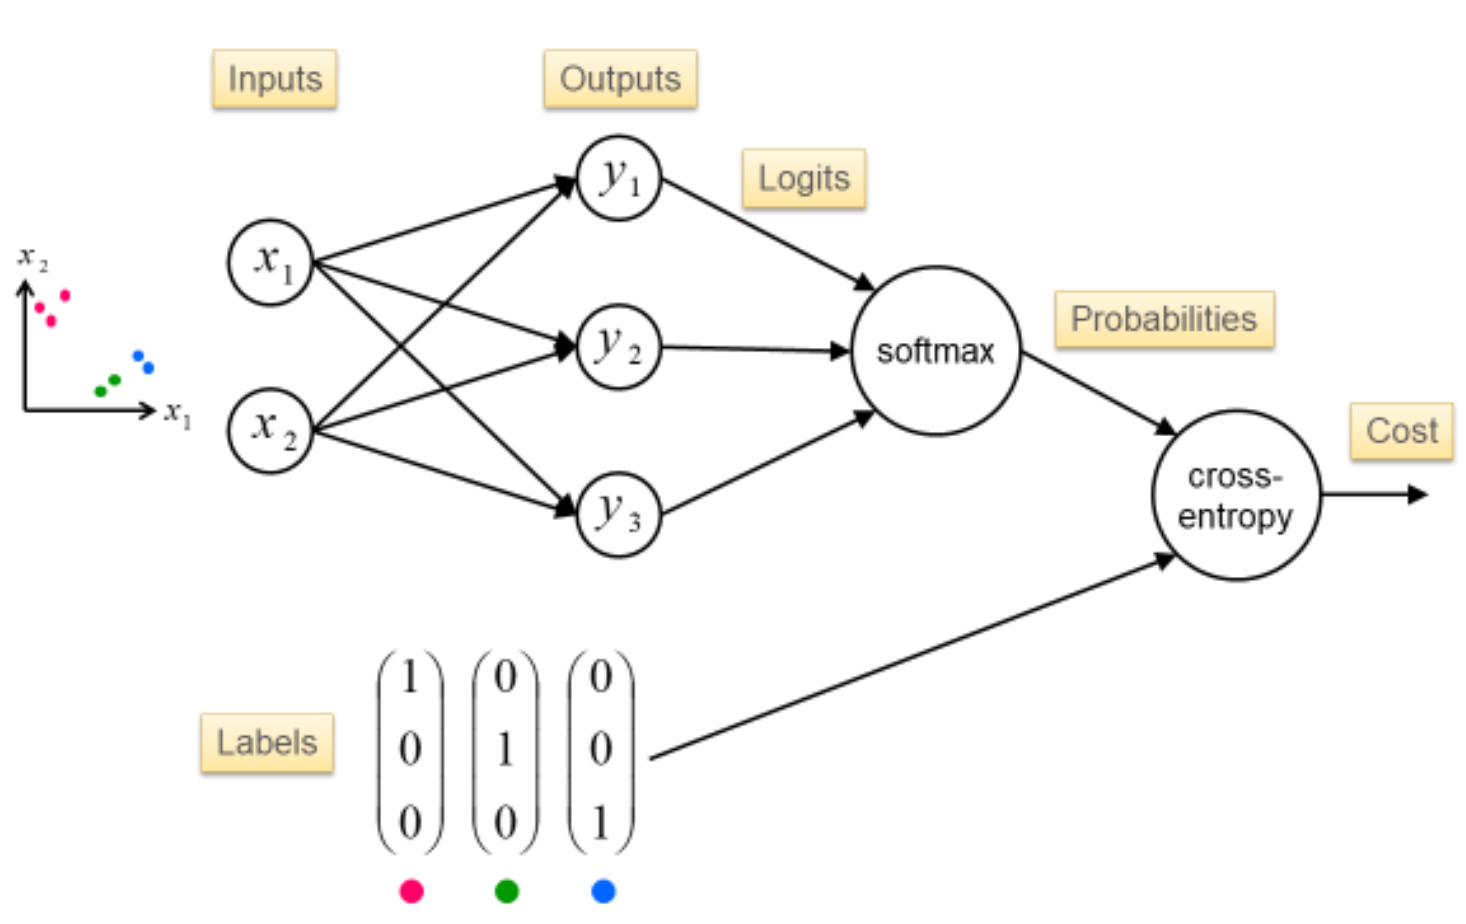





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Loss at step  500 = 0.084, acc = 0.972
Loss at step 1000 = 0.078, acc = 0.972
Loss at step 1500 = 0.076, acc = 0.972
Loss at step 2000 = 0.075, acc = 0.972
Loss at step 2500 = 0.075, acc = 0.973
Loss at step 3000 = 0.074, acc = 0.973
Loss at step 3500 = 0.074, acc = 0.972
Loss at step 4000 = 0.074, acc = 0.972
Loss at step 4500 = 0.073, acc = 0.972
Loss at step 5000 = 0.073, acc = 0.972


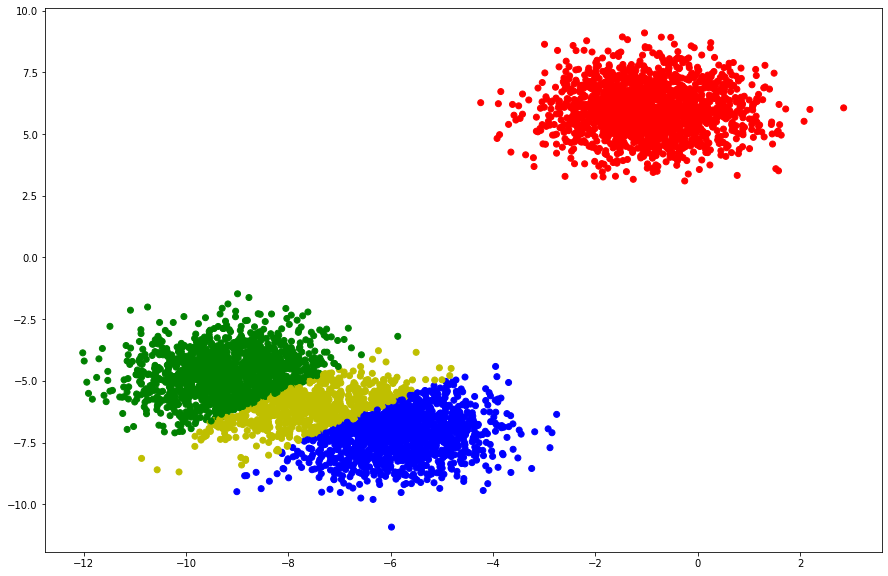

In [6]:
import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

model = Sequential()
# units is the output
model.add(Dense(input_shape=(2,), units=3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

n_steps = 5000

for step in range(n_steps//10,n_steps+1,n_steps//10):
    model.fit(train_x,
              train_y,
              epochs=n_steps//10,
              batch_size=m,
              verbose=0)
    
    loss_and_acc = model.evaluate(train_x,
                                  train_y,
                                  batch_size=m,
                                  verbose=0)
    
    print('Loss at step {:4} = {:5.3f}, acc = {:5.3f}'.format(step, *loss_and_acc))

prediction = model.predict(train_x, batch_size=m)

threshold = 0.95

c = [None]*m

for i in range(m):
    ix = np.argmax(prediction[i,:])   # The color with the highest probability
    c[i] = ('r', 'g', 'b')[ix]
    if prediction[i,ix] < threshold:
        c[i] = 'y'
    
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()


In the following piece of code we will plot the decision boundary of the whole graph.

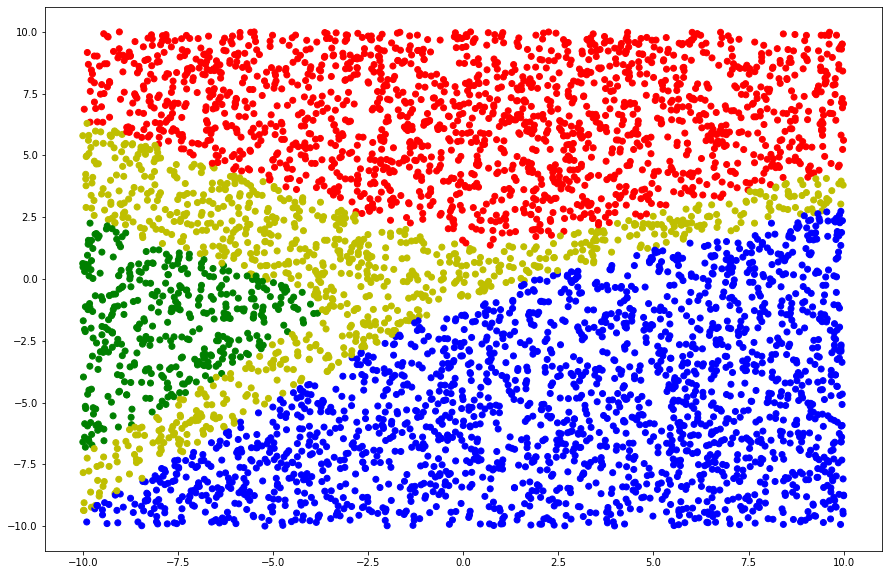

In [7]:
# Test data
test_m = 5000
test_x = (np.random.random((test_m,n_features)).astype(np.float32) - 0.5) * 20.0

prediction = model.predict(test_x, batch_size=test_m)

c = [None for i in range(test_m)]

threshold = 0.95

# Color each test point according to the label with the highest probability
for i in range(test_m):
    x = np.argmax(prediction[i,:])
    c[i] = ('r', 'g', 'b')[x]
    if prediction[i,x] < threshold:
        c[i] = 'y'
        
plt.scatter(test_x[:,0], test_x[:,1], color=c)
plt.show()

# Non-linear regression

Let's start with an example of a model.

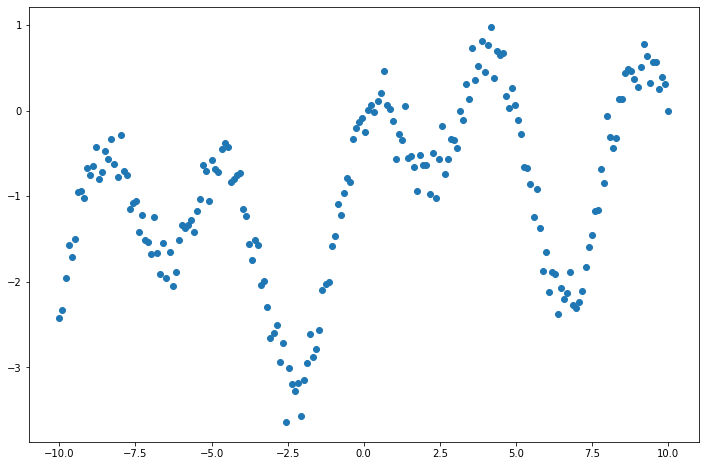

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset

m = 200
train_slope  = 0.1
train_offset = -1.0

train_x = np.linspace(-10, 10, m).astype(np.float32)
rng = np.random.RandomState(seed=42)
train_y = (train_slope * train_x + np.sin(train_x / 1.5) + np.cos(train_x / 0.7) + train_offset +
           rng.normal(0.0, 0.2, size=len(train_x))).astype(np.float32)

plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(train_x, train_y, 'o');
plt.show()

Let's suppose we fit the above model with straight lines. Even if we use the gradient descend, the best possible solution is not very good hence the model is said to be **underfitting the data**.

The model has **bias** because it assumes that everything is a straight line and it has **low variance** because has only two trainable parameters (slope and offset).

We need to make the model more complex, to add more trainable parameters to the model. This can be done adding more hidden units but unfortunately it won't be enough. In fact we need the hidden units to have some **non-linearities**

Adding non-linear polynomial functions for every hidden unit doesn't scale very well and the number of polynomial terms to fit the data tends to explode. Moreover we need the hidden unit to understand the data that is processing and this is a dead end in deep learning. We want to be as generic as possible.

The key point is that every unit needs to:
* sum the weights of its inputs
* non-linear function of the output (sigmoid or ReLU)

That's it.


## Rectified Linear Unit - ReLU

So we chose ReLU as non-linear function for our units of our network: **this means the whole network calculates a piecewise linear function with the number of vertices given by the number of hidden units.**

Increasing the number of the hidden units we increment the details of the whole model and in theory we could fit the network to any continous function of one variable.

The next problem is the scaling of the data: **we need to keep the input data in the interesing region of each activation function**.
If the data is one side or the other of each non-linearity, we would end up with a linear model.

A good rule of thumb is to normalize the data so that it has mean = 0 and standard deviation = 1. An alternative rule of thumb would be to normalize the input data so that it lies in the range [-1.0, +1.0]

Let's normalize the data with numpy.

In [9]:
train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)
train_x = train_x - np.mean(train_x, axis=0) # Subtrach the mean
train_x = train_x / np.max(train_x, axis=0) # Divide by the maximum

We now need to initialise the weights and the biases of the network. This is an important step because we need **to break the simmetry of the network**. If weights are all initialised with the same values the forward and back propagation would be the same for every unit.

So the simmetry need to be broken initialising every weight to a different value across the units in a layer. The best and simples approach is to use a **random** initialization in a **truncated normal distribution**

Let's build the model and implement the gradient descend

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________
Loss at step  2000 = 0.355
Loss at step  4000 = 0.067
Loss at step  6000 = 0.044
Loss at step  8000 = 0.035
Loss at step 10000 = 0.034
Loss at step 12000 = 0.031
Loss at step 14000 = 0.032
Loss at step 16000 = 0.030
Loss at step 18000 = 0.029
Loss at step 

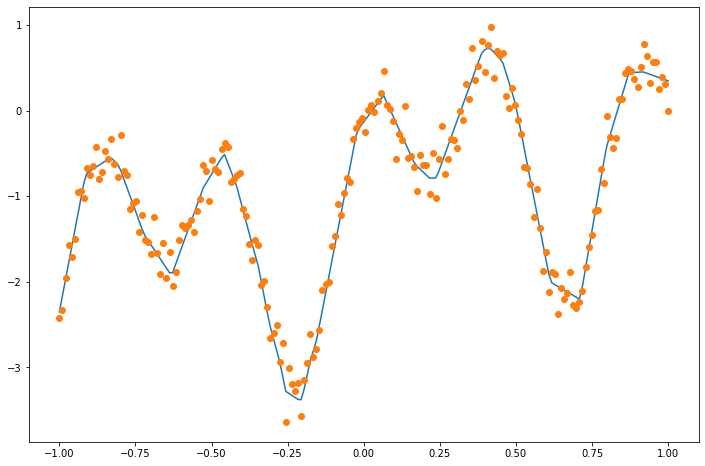

In [10]:
import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

n_hidden = 16

# Initialisation of weights happens automatically.

# Note the relu activation function
model = Sequential()
# One input feature
model.add(Dense(input_shape=(1,), units=n_hidden, activation='relu'))
model.add(Dense(units=n_hidden, activation='relu'))
model.add(Dense(units=n_hidden, activation='relu'))
#model.add(Dense(units=n_hidden, activation='relu'))
# One output feature
model.add(Dense(units=1))
model.summary()

# Cost or loss function is MSE because this is a regression problem.
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.035))

# Following the gradien descend with some plotting

n_steps = 20000

for step in range(n_steps//10,n_steps+1,n_steps//10):
    model.fit(train_x, train_y, epochs=n_steps//10, batch_size=m, verbose=0)
    
    loss = model.evaluate(train_x, train_y, batch_size=m, verbose=0)
    print('Loss at step {:5} = {:5.3f}'.format(step, loss))

prediction = model.predict(train_x, batch_size=m)

plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(train_x, prediction)
plt.plot(train_x, train_y, 'o');
plt.show()

The above network has a good(ish) prediction. In order to improve its learning, we can change:
* learning rate
* number of hidden units
* number of layers

If you uncomment the last layer, you will see an improved prediction.

This is the magic of deep learning, but there is no simple explanation for why it works! 

Deep neural networks have a large number of trainable parameters so there are many alternative paths through the network, and training could "choose" any of these paths based on the random initialization of the weights.

A deep neural network:
* **has high variance**: many degrees of freedom
* **is degenerate**: different configurations that behave equally
* is redundant: you can knock individual units without destroung the network

